Three Body Problem
------------------------
- Animation of three massive bodies acting freely under gravity in flat space.

In [1]:
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

Define Constants and Reference Values
------------------------------------
- Reference values are denoted by the '_nd' suffix. 
- They are used to make our equations dimensionless and easier to solve numerically

In [14]:
G=6.67408e-11 #N-m2/kg2

m_nd = 1.989e+30 #kg 
r_nd = 5.326e+12 #m
v_nd = 30000 #ms^-1
t_nd = 79.91*365*24*3600*0.51 #s 

K1 = G*t_nd*m_nd/(r_nd**2*v_nd)
K2 = v_nd*t_nd/r_nd

Define Inital Conditions
----------------

In [16]:
time_span = np.linspace(0,8,2000) 

m1 = 1 
m2 = 0.000954588
m3 = 3.00273e-6

r1 = [0,0,0]
r2 = [0.5,0,0]
r3 = [0,0.5,0]

r1 = np.array(r1,dtype="float64")
r2 = np.array(r2,dtype="float64")
r3 = np.array(r3,dtype='float64')

v1 = [0,-0.1,0] 
v2 = [0,0.1,0]
v3 = [-0.1,0,0]

v1 = np.array(v1,dtype="float64")
v2 = np.array(v2,dtype="float64")
v3 = np.array(v3,dtype="float64")

Define function to solve our equations of motion
---------------------------------------

In [17]:
def eq_motion(w,t,G,m1,m2,m3):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]
    
    r12 = sci.linalg.norm(r2-r1)
    r13 = sci.linalg.norm(r3-r1)
    r23 = sci.linalg.norm(r3-r2)
    
    dv1bydt = K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt = K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt = K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt = K2*v1
    dr2bydt = K2*v2
    dr3bydt = K2*v3
    
    r12_derivs = np.concatenate((dr1bydt,dr2bydt))
    r_derivs = np.concatenate((r12_derivs,dr3bydt))
    
    v12_derivs = np.concatenate((dv1bydt,dv2bydt))
    v_derivs = np.concatenate((v12_derivs,dv3bydt))
    
    derivs = np.concatenate((r_derivs,v_derivs))
    return derivs


init_params = np.array([r1,r2,r3,v1,v2,v3]) 
init_params = init_params.flatten() 


Find and unpack solutions
----------------

In [18]:
import scipy.integrate
three_body_sol = sci.integrate.odeint(eq_motion,init_params,time_span,args=(G,m1,m2,m3))

r1_sol = three_body_sol[:,:3] 
r2_sol = three_body_sol[:,3:6] 
r3_sol = three_body_sol[:,6:9]

rcom_sol=(m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)

r1com_sol = r1_sol-rcom_sol
r2com_sol = r2_sol-rcom_sol
r3com_sol = r3_sol-rcom_sol

x1 = r1com_sol[:,0]
y1 = r1com_sol[:,1]
z1 = r1com_sol[:,2]

x2 = r2com_sol[:,0]
y2 = r2com_sol[:,1]
z2 = r2com_sol[:,2]

x3 = r3com_sol[:,0]
y3 = r3com_sol[:,1]
z3 = r3com_sol[:,2]

Animate the Motion
-------------------

<IPython.core.display.Javascript object>


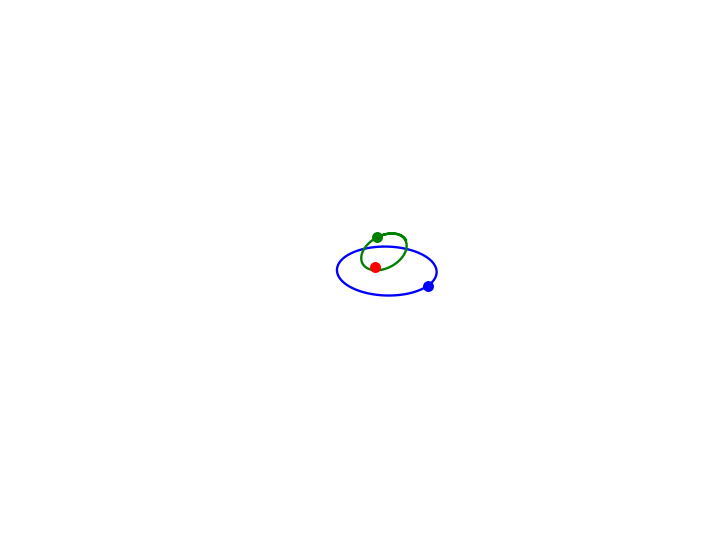

In [19]:
%matplotlib notebook

fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.set(xlim3d=(-1, 1))
ax.set(ylim3d=(-1, 1))
ax.set(zlim3d=(-1, 1))
plt.axis('off')

def animate(i, data1, data2, data3, line1, line2, line3):
    start=max((i-10,0))
    
    line1.set_data(x1[0:i],y1[0:i])
    line1.set_3d_properties(z1[0:i])
    
    line2.set_data(x2[0:i],y2[0:i])
    line2.set_3d_properties(z2[0:i])
    
    line3.set_data(x3[0:i],y3[0:i])
    line3.set_3d_properties(z3[0:i])
    
    pt1.set_data(x1[i-1:i],y1[i-1:i])
    pt1.set_3d_properties(z1[i-1:i])
    
    pt2.set_data(x2[i-1:i],y2[i-1:i])
    pt2.set_3d_properties(z2[i-1:i])
    
    pt3.set_data(x3[i-1:i],y3[i-1:i])
    pt3.set_3d_properties(z3[i-1:i])
    
    return line1,line2,line3,pt1,pt2,pt3


data1 = np.array([x1, y1, z1])
data2 = np.array([x2, y2, z2])
data3 = np.array([x3, y3, z3])

line1, = plt.plot(data1[0], data1[1], data1[2], c='r')
line2, = plt.plot(data2[0], data2[1], data2[2], c='b')
line3, = plt.plot(data3[0], data3[1], data3[2], c='g')

pt1, = ax.plot3D(x1, y1, z1 ,"o-",c='r')
pt2, = ax.plot3D(x2, y2, z2 ,"o-",c='b')
pt3, = ax.plot3D(x3, y3, z3 ,"o-",c='g')


line_ani = animation.FuncAnimation(fig, animate, frames=len(time_span), fargs=(data1,data2,data3, line1,line2,line3,), interval=50, blit=False)

plt.show()